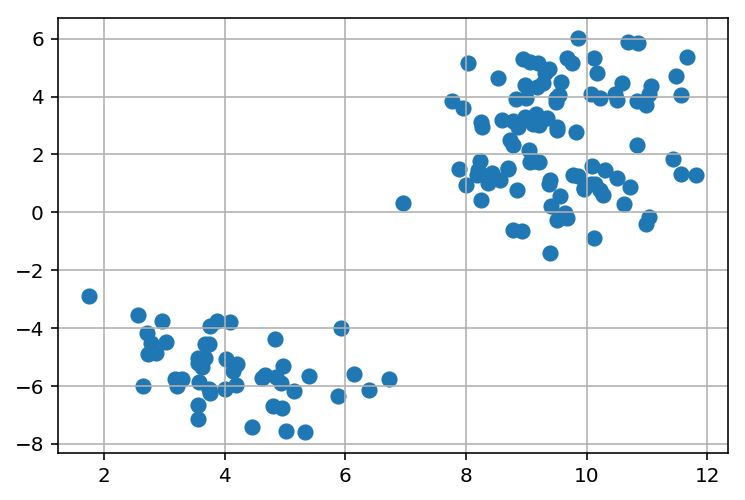

In [20]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=150, n_features=2, centers=3, random_state=4)

plt.scatter(X[:,0], X[:,1], marker='o', s=50)
plt.grid()

In [2]:
# Distortionは分類したものの中心点からの距離
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-4)
y_km=km.fit_predict(X)
print('Distortion: %.2f' % km.inertia_)

Distortion: 287.88


In [5]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-4)
y_km=km.fit_predict(X)
print('Distortion: %.2f' % km.inertia_)

Distortion: 553.06


In [6]:
from sklearn.cluster import KMeans
kmp=KMeans(n_clusters=3, init='k-means++', n_init=10, max_iter=100, tol=1e-4)
y_kmp=kmp.fit_predict(X)
print('Distortion: %.2f' % kmp.inertia_)

Distortion: 287.88


In [7]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-4)
y_km=km.fit_predict(X)
print('Distortion: %.2f' % km.inertia_)

Distortion: 235.06


In [10]:
from sklearn.datasets import load_iris
import pandas as pd
iris_dataset = load_iris()

In [4]:
x = iris_dataset.data
y = iris_dataset.target

In [6]:
iris_dataset # to chech the label name

{'DESCR': 'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ==

In [17]:
variables = iris_dataset.feature_names

In [18]:
df = pd.DataFrame(x, columns=variables)

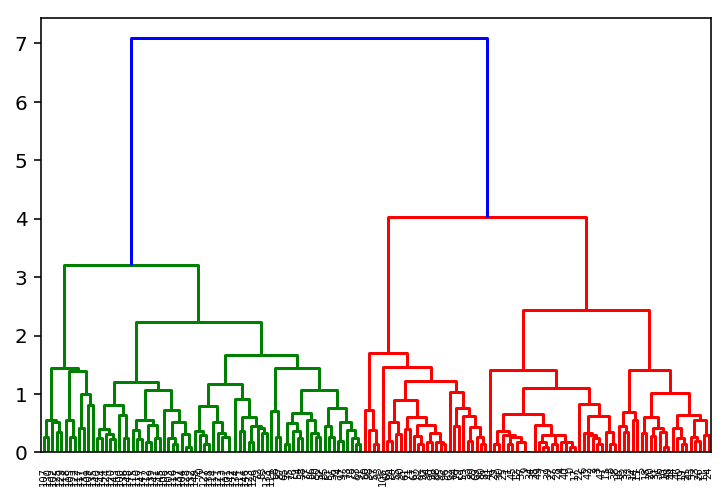

In [21]:
from scipy.cluster.hierarchy import linkage, dendrogram
row_clusters = linkage(df.values, method='complete', metric='euclidean')

row_dendr = dendrogram(row_clusters)

In [28]:
from sklearn.cluster import AgglomerativeClustering

# completeは最大結合法のcomplete?
ac = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'complete')
labels = ac.fit_predict(x)
print('Cluster labels: %s' % labels)

Cluster labels: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 1
 1 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [27]:
?AgglomerativeClustering

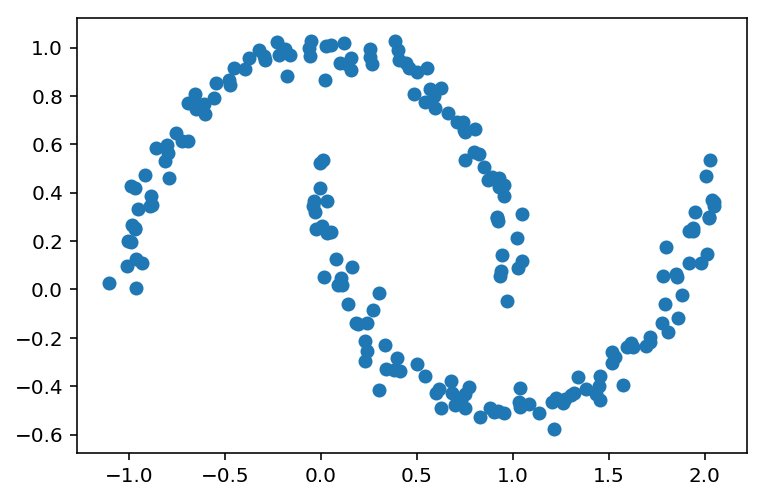

In [29]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05)
plt.scatter(X[:,0], X[:,1])

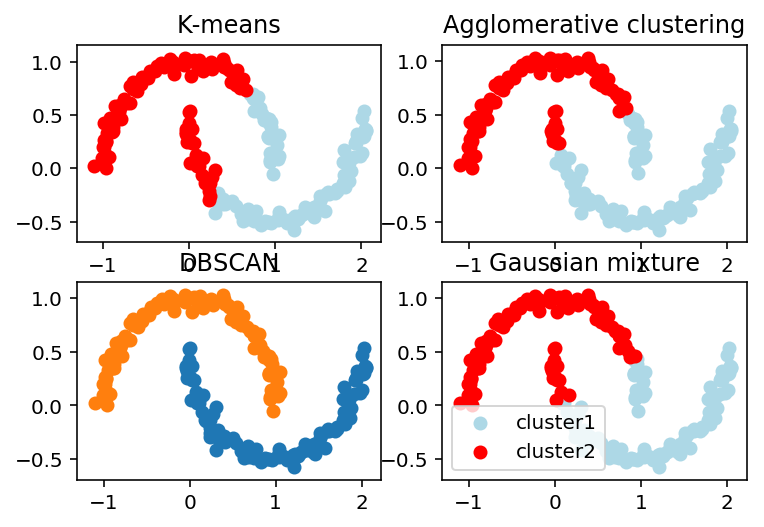

In [33]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import mixture
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

km = KMeans(n_clusters=2)
y_km = km.fit_predict(X)
ax1.scatter(X[y_km==0,0], X[y_km==0,1], c='lightblue', label='cluster1')
ax1.scatter(X[y_km==1,0], X[y_km==1,1], c='red', label='cluster2')
ax1.set_title('K-means')

ac=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
y_ac=ac.fit_predict(X)
ax2.scatter(X[y_ac==0,0], X[y_ac==0,1], c='lightblue', label='cluster1')
ax2.scatter(X[y_ac==1,0], X[y_ac==1,1], c='red', label='cluster2')
ax2.set_title('Agglomerative clustering')

db=DBSCAN(eps=0.2, min_samples=5, metric='euclidean')
y_db=db.fit_predict(X)
clusters=np.unique(y_db)
for c in clusters:
    ax3.scatter(X[y_db==c,0], X[y_db==c,1], label='cluster %d' % c)
ax3.set_title('DBSCAN')

gmm=mixture.GaussianMixture(n_components=2, covariance_type='full')
y_gmm=gmm.fit(X).predict(X)
ax4.scatter(X[y_gmm==0,0], X[y_gmm==0,1], c='lightblue', label='cluster1')
ax4.scatter(X[y_gmm==1,0], X[y_gmm==1,1], c='red', label='cluster2')
ax4.set_title('Gaussian mixture')

plt.legend()